In [1]:
#This notebook will let you run BBii-Decon
#Dependencies are numpy, matplotlib, opencv-python, pypher, scipy, skimage, tifffile, time 
#Author: Graham Dellaire
from bbii_decon import bbii

#Load dependencies
import PIL
import scipy.io
import matplotlib.pyplot as plt
from pypher.pypher import psf2otf
import scipy.signal
import numpy as np
import time
import tifffile as tiff
from tifffile import imsave, imread

PSF Image float32


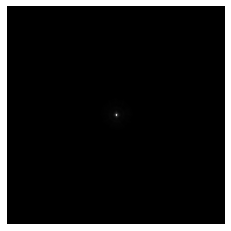

DAPI stained HeLa Cell Nuclei float32


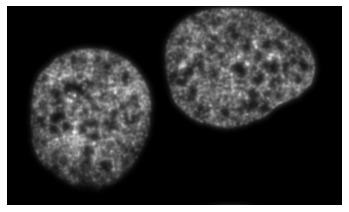

Phalloidin-stained Actin in a HeLa Cell float32


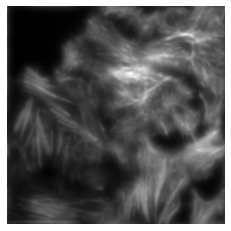

In [2]:
#Load TIFF images using tifffile
image1 = tiff.imread('DAPI_blurred.tif')
image2 = tiff.imread('Actin3_blurred.tif')

PSF = tiff.imread('PSF.tif')


print('PSF Image', PSF.dtype)
# show image1
plt.axis("off")
plt.imshow(PSF, cmap="gray")
plt.show() 

print('DAPI stained HeLa Cell Nuclei', PSF.dtype)
# show image1
plt.axis("off")
plt.imshow(image1, cmap="gray")
plt.show() 

print('Phalloidin-stained Actin in a HeLa Cell', PSF.dtype)
# show image2
plt.axis("off")
plt.imshow(image2, cmap="gray")
plt.show() 



Execution Time:
2.455382823944092
seconds
Original DAPI Image [right] and after Decovolution [left]


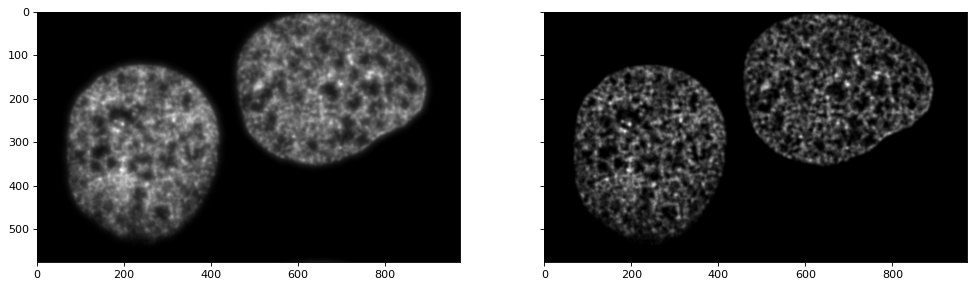

In [3]:
# begin timing of BBii reconstruction Image 2
import time
start = time.time()
print("Execution Time:")

# run the deblurring (not sure what optimal parameters are -- there is some heuristic in the thesis)
[f, alpha, proj] = bbii(PSF, image1, 10, 1.0e-08, 0.98)

# end timing of BBii reconstruction
end = time.time()
print(end - start)
print("seconds")

# Compare the orginal image to the deblurred image

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), dpi=80, sharex=True, sharey=True)
ax[0].imshow(image1, cmap='gray')
ax[1].imshow(f, cmap='gray')

print('Original DAPI Image [right] and after Decovolution [left]')


Ground Truth DAPI Image [right] and after Decovolution [left]


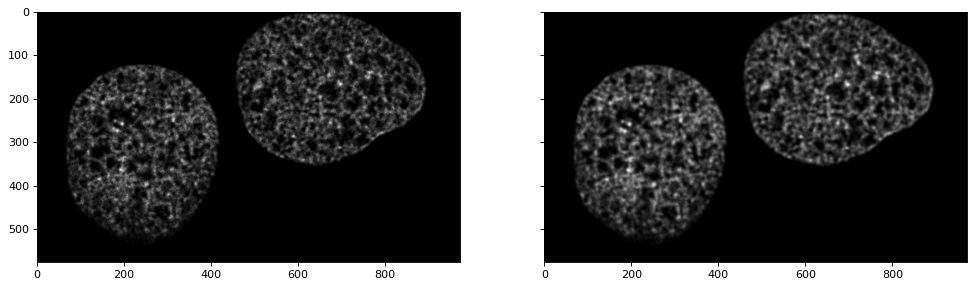

In [5]:
ground = tiff.imread(r'DAPI_GroundTruth.tif')

# Compare the Ground Truth to deblurred image

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), dpi=80, sharex=True, sharey=True)
ax[0].imshow(ground, cmap='gray')
ax[1].imshow(f, cmap='gray')

print('Ground Truth DAPI Image [right] and after Decovolution [left]')

Execution Time:
1.4705958366394043
seconds
Original Actin Image [right] and after Decovolution [left]


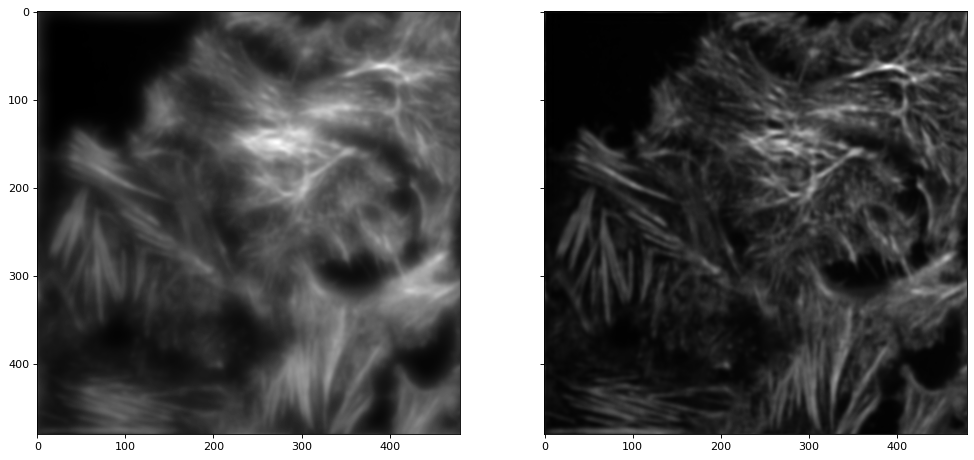

In [6]:
# begin timing of BBii reconstruction Image 2
import time
start = time.time()
print("Execution Time:")

# run the deblurring (not sure what optimal parameters are -- there is some heuristic in the thesis)
[f, alpha, proj] = bbii(PSF, image2, 15, 1.0e-08, 0.98)

# end timing of BBii reconstruction
end = time.time()
print(end - start)
print("seconds")

# Compare the orginal image to the deblurred image

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), dpi=80, sharex=True, sharey=True)
ax[0].imshow(image2, cmap='gray')
ax[1].imshow(f, cmap='gray')

print('Original Actin Image [right] and after Decovolution [left]')

Ground Truth Actin Image [right] and after Decovolution [left]


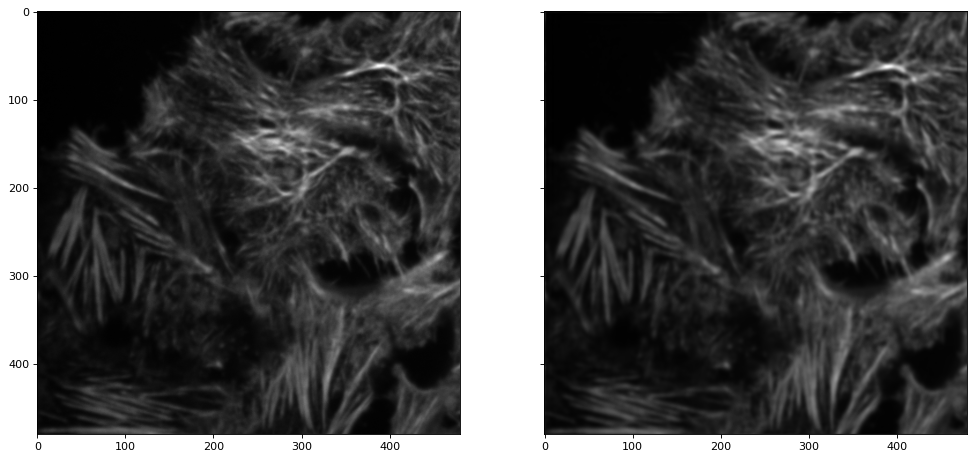

In [7]:
ground = tiff.imread(r'Actin3_GroundTruth.tif')

# Compare the Ground Truth to deblurred image

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), dpi=80, sharex=True, sharey=True)
ax[0].imshow(ground, cmap='gray')
ax[1].imshow(f, cmap='gray')

print('Ground Truth Actin Image [right] and after Decovolution [left]')
